<a href="https://colab.research.google.com/github/LEChaney/ML-RayCast-Experiments/blob/master/Image_GeneratorV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/LEChaney/ML-RayCast-Experiments
%cd ML-RayCast-Experiments
%pwd

Cloning into 'ML-RayCast-Experiments'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 273 (delta 27), reused 2 (delta 0), pack-reused 206
Receiving objects: 100% (273/273), 44.85 MiB | 27.71 MiB/s, done.
Resolving deltas: 100% (135/135), done.
/content/ML-RayCast-Experiments


'/content/ML-RayCast-Experiments'

In [0]:
import os
import pygame
os.environ['SDL_VIDEODRIVER']='dummy'
file_directory = os.getcwd()
os.chdir("/content/ML-RayCast-Experiments/Keras-FlappyBird-master/Keras-FlappyBird-master")
print(os.getcwd())

In [0]:
import cv2
import numpy as np
'''import numpy as np
import sys
import random
import pygame
import flappy_bird_utils
import pygame.surfarray as surfarray
from pygame.locals import *
from itertools import cycle'''

SCREENWIDTH  = 288
SCREENHEIGHT = 512
def Image_Generator(filepath):

    file = open(filepath,"r")
    running = True
    while running:
        current = file.readline()
        if file.readline() == "":
            break;
        data_list = current.split(" ")
        data_list.pop()
        
        if (len(data_list) < 16):
            loop_times = 16 - len(data_list)
            counter = 0
            while counter < loop_times:
                data_list.append(None)
                counter += 1
        #print(data_list)
        #data_list = list(map(int, data_list))
        bird_index = int(data_list[3])
        upper_left_x = int(int(data_list[4]) + SCREENWIDTH /2)
        upper_left_y = int(int(data_list[5]) + SCREENHEIGHT /2)
        '''CaseNo = data_list[0]
        bird_x = data_list[1] + SCREENWIDTH * 2
        bird_y = data_list[2] + SCREENHEIGHT * 2
        

        down_left_x = data_list[6] + SCREENWIDTH * 2
        down_left_y = data_list[7] + SCREENHEIGHT * 2
        upper_middle_x = data_list[8] + SCREENWIDTH * 2
        upper_middle_y = data_list[9] + SCREENHEIGHT * 2
        down_middle_x = data_list[10] + SCREENWIDTH * 2
        down_middle_y = data_list[11] + SCREENHEIGHT * 2
        upper_right_x = data_list[12] + SCREENWIDTH * 2
        upper_right_y = data_list[13] + SCREENHEIGHT * 2
        down_right_x = data_list[14] + SCREENWIDTH * 2
        down_right_y = data_list[15] + SCREENHEIGHT * 2'''
        pipe_green = cv2.imread("Keras-FlappyBird-master/Keras-FlappyBird-master/assets/sprites/pipe-green.png") #numpy array
        background = cv2.imread("Keras-FlappyBird-master/Keras-FlappyBird-master/assets/sprites/background-black.png")
        bird_down = cv2.imread("Keras-FlappyBird-master/Keras-FlappyBird-master/assets/sprites/redbird-downflap.png")
        bird_mid = cv2.imread("Keras-FlappyBird-master/Keras-FlappyBird-master/assets/sprites/redbird-midflap.png")
        bird_up = cv2.imread("Keras-FlappyBird-master/Keras-FlappyBird-master/assets/sprites/redbird-upflap.png")
        #bird_download = cv2.imread("Keras-FlappyBird-master/Keras-FlappyBird-master/assets/sprites/redbird-downflap.png")
        
        print("pipe_green.shape: ",pipe_green.shape)
        print()
        print("upper_left_x: ", upper_left_x)
        print()
        print("bird_down.shape[0]: ",bird_down.shape[0])
        print()
        print("upper_left_y: ", upper_left_y)
        print()
        print("bird_down.shape[1]: ", bird_down.shape[1])
        print("background.shape: ", background.shape)
        
        print("bird_down: ", bird_down)
        #background[x:pip.shape[1]e_green[0]]
        reverse_pipe = rotate("Keras-FlappyBird-master/Keras-FlappyBird-master/assets/sprites/pipe-green.png")
        #plt.imshow(pipe_green)
        #plt.show()
        running = False
        if bird_index == 0:
          background[upper_left_x:bird_down.shape[0], upper_left_y:bird_down.shape[1], :] = pipe_green
          plt.imshow(background)
          plt.show()
        #print(type(pipe_green))
        elif bird_index == 1:
          background[upper_left_x:bird_mid.shape[0], upper_left_y:bird_mid.shape[1], :] = pipe_green
          plt.imshow(background)
          plt.show()
        else:
          background[upper_left_x:bird_up.shape[0], upper_left_x:bird_up.shape[1], :] = pipe_green
          plt.imshow(background)
          plt.show()  

          
    #print("bird_down: ", bird_down)      
    file.close()
      

    

'''def csv_image_generator(inputPath, bs, lb, mode="train", aug=None):
	# open the CSV file for reading
	f = open(inputPath, "r")

	# loop indefinitely
	while True:
		# initialize our batches of images and labels
		images = []
		labels = []

		# keep looping until we reach our batch size
		while len(images) < bs:
			# attempt to read the next line of the CSV file
			line = f.readline()

			# check to see if the line is empty, indicating we have
			# reached the end of the file
			if line == "":
				# reset the file pointer to the beginning of the file
				# and re-read the line
				f.seek(0)
				line = f.readline()

				# if we are evaluating we should now break from our
				# loop to ensure we don't continue to fill up the
				# batch from samples at the beginning of the file
				if mode == "eval":
					break

			# extract the label and construct the image
			line = line.strip().split(",")
			label = line[0]
			image = np.array([int(x) for x in line[1:]], dtype="uint8")
			image = image.reshape((64, 64, 3))

			# update our corresponding batches lists
			images.append(image)
			labels.append(label)

		# one-hot encode the labels
		labels = lb.transform(np.array(labels))

		# if the data augmentation object is not None, apply it
		if aug is not None:
			(images, labels) = next(aug.flow(np.array(images),
				labels, batch_size=bs))

		# yield the batch to the calling function
		yield (np.array(images), labels)'''


'''1. the number of case
2. the x of bird
3. the y of bird
4. the index of bird
5. the x of pipe1(upper left)
6. the y of pipe1(upper left)
7. the x of pipe2(down left)
8. the y of pipe2(down left)
9. the x of pipe3(upper middle)
10. the y of pipe3(upper middle)
11. the x of pipe4(down middle)
12. the y of pipe4(down middle)
13. the x of pipe5(upper right)
14. the y of pipe5(upper right)
15. the x of pipe6(down right)
16. the y of pipe6(down right)'''

file= "data.txt" #file path or a file in the current folder
Image_Generator(file)


pipe_green.shape:  (320, 52, 3)

upper_left_x:  428

bird_down.shape[0]:  24

upper_left_y:  76

bird_down.shape[1]:  34
background.shape:  (512, 288, 3)
bird_down:  [[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [70 56 83]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


ValueError: ignored

In [0]:
import cv2
import numpy as np

im = cv2.imread("Keras-FlappyBird-master/Keras-FlappyBird-master/assets/sprites/pipe-green.png")
#print (im.shape[0])
#print (im.shape[1])
print(im.row)

320
52


AttributeError: ignored

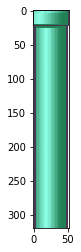

In [0]:
#from PIL import Image
from matplotlib import pyplot as plt
#image = Image.fromarray(im,'RGB')
#image.save("000.png")
#pyt.show()
plt.imshow(im)
plt.show()

In [0]:
from PIL import Image
def rotate(image_path):
    """
    Rotate the given photo the amount of given degreesk, show it and save it
    @param image_path: The path to the image to edit
    @param degrees_to_rotate: The number of degrees to rotate the image
    @param saved_location: Path to save the cropped image
    """
    degrees_to_rotate = 180
    image_obj = Image.open(image_path)
    rotated_image = image_obj.rotate(degrees_to_rotate)
    rotated_image.save("000.png")
    im = cv2.imread("000.png")
    #plt.imshow(im)
    #plt.show()
    return im
    


array([[[255, 255, 255],
        [255, 255, 255],
        [ 71,  56,  84],
        ...,
        [ 71,  56,  84],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [ 71,  56,  84],
        ...,
        [ 71,  56,  84],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [ 71,  56,  84],
        ...,
        [ 71,  56,  84],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 71,  56,  84],
        [ 71,  56,  84],
        [ 38, 132,  90],
        ...,
        [113, 221, 192],
        [ 71,  56,  84],
        [ 71,  56,  84]],

       [[ 71,  56,  84],
        [ 71,  56,  84],
        [ 71,  56,  84],
        ...,
        [ 71,  56,  84],
        [ 71,  56,  84],
        [ 71,  56,  84]],

       [[ 71,  56,  84],
        [ 71,  56,  84],
        [ 71,  56,  84],
        ...,
        [ 71,  56,  84],
        [ 71,  56,  84],
        [ 71,  56,  84]]

In [2]:
import os
os.environ['SDL_VIDEODRIVER']='dummy'
file_directory = os.getcwd()
os.chdir("/content/ML-RayCast-Experiments/Keras-FlappyBird-master/Keras-FlappyBird-master")
print(os.getcwd())

/content/ML-RayCast-Experiments/Keras-FlappyBird-master/Keras-FlappyBird-master


In [8]:
import sys
#sys.path.pop(1)
#sys.path.insert(1,"/content/ML-RayCast-Experiments/Keras-FlappyBird-master/Keras-FlappyBird-master/game")
print(sys.path)

['', '/content/ML-RayCast-Experiments/Keras-FlappyBird-master/Keras-FlappyBird-master/game', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']


In [10]:
%pip install pygame

     |████████████████████████████████| 11.4MB 2.8MB/s 


In [0]:
import wrapped_flappy_bird as game
import numpy as np
import flappy_bird_utils
import cv2
import sys
import random
import pygame
import pygame.surfarray as surfarray
from pygame.locals import *
from itertools import cycle
import matplotlib.pyplot as plt
import PIL.Image
#from cStringIO import StringIO
import IPython.display


In [52]:
GAME = 'bird' # the name of the game being played for log files
CONFIG = 'nothreshold'
ACTIONS = 2 # number of valid actions
GAMMA = 0.99 # decay rate of past observations
OBSERVATION = 3200. # timesteps to observe before training
EXPLORE = 3000000. # frames over which to anneal epsilon
FINAL_EPSILON = 0.0001 # final value of epsilon
INITIAL_EPSILON = 0.1 # starting value of epsilon
REPLAY_MEMORY = 50000 # number of previous transitions to remember
BATCH = 32 # size of minibatch
FRAME_PER_ACTION = 1
LEARNING_RATE = 1e-4

FPS = 30
SCREENWIDTH  = 288
SCREENHEIGHT = 512

pygame.init()
FPSCLOCK = pygame.time.Clock()
SCREEN = pygame.display.set_mode((SCREENWIDTH, SCREENHEIGHT))
pygame.display.set_caption('Flappy Bird')

IMAGES, SOUNDS, HITMASKS = flappy_bird_utils.load()
PIPEGAPSIZE = 100 # gap between upper and lower part of pipe
BASEY = SCREENHEIGHT * 0.79

PLAYER_WIDTH = IMAGES['player'][0].get_width()
PLAYER_HEIGHT = IMAGES['player'][0].get_height()
PIPE_WIDTH = IMAGES['pipe'][0].get_width()
PIPE_HEIGHT = IMAGES['pipe'][0].get_height()
BACKGROUND_WIDTH = IMAGES['background'].get_width()

PLAYER_INDEX_GEN = cycle([0, 1, 2, 1])

img_rows , img_cols = 80, 80
#Convert image into Black and white
img_channels = 4 #We stack 4 frames

game_state = game.GameState()
do_nothing = np.zeros(ACTIONS)
do_nothing[0] = 1
game_state.frame_step(do_nothing)

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8), 0.1, False)

In [0]:

'''import numpy as np
import sys
import random
import pygame
import flappy_bird_utils
import pygame.surfarray as surfarray
from pygame.locals import *
from itertools import cycle'''

SCREENWIDTH  = 288
SCREENHEIGHT = 512

def Image_Generator(filepath):

    file = open(filepath,"r")
    running = True
    count = 100
    while running:
        current = file.readline()
        count -= 1
        if current == "":
            break;
        if current[0] == "-":
            continue
        if count < 0:
          break;
        data_list = current.split(" ")
        data_list.pop()
        
        ''' if (len(data_list) < 16):
            loop_times = 16 - len(data_list)
            counter = 0
            while counter < loop_times:
                data_list.append(None)
                counter += 1'''
        #print(data_list)
        #data_list = list(map(int, data_list))

        CaseNo = int(float(data_list[0]))
        game_state.playerx = int(float(data_list[1]) + SCREENWIDTH /2)
        game_state.playery = int(float(data_list[2]) + SCREENWIDTH /2)
        game_state.playerIndex = int(data_list[3])        
        
        game_state.upperPipes = []
        game_state.lowerPipes = []
        
        for i in range(4,len(data_list),4):
          
            newPipe = game.getRandomPipe()
            game_state.upperPipes.append(newPipe[0])
            game_state.upperPipes[int((i-4)/4)]['x'] = int(float(data_list[i]) + SCREENWIDTH /2)
            game_state.upperPipes[int((i-4)/4)]['y'] = int(float(data_list[i+1]) + SCREENWIDTH /2)

            newPipe = game.getRandomPipe()     
            game_state.lowerPipes.append(newPipe[0])
            game_state.lowerPipes[int((i-4)/4)]['x'] = int(float(data_list[i+2]) + SCREENWIDTH /2)
            game_state.lowerPipes[int((i-4)/4)]['y'] = int(float(data_list[i+3]) + SCREENWIDTH /2)
        
        # draw sprites
        SCREEN.blit(IMAGES['background'], (0,0))

        for uPipe, lPipe in zip(game_state.upperPipes, game_state.lowerPipes):
            SCREEN.blit(IMAGES['pipe'][0], (uPipe['x'], uPipe['y']))
            SCREEN.blit(IMAGES['pipe'][1], (lPipe['x'], lPipe['y']))

        SCREEN.blit(IMAGES['base'], (game_state.basex, BASEY))
        # print score so player overlaps the score
        # showScore(self.score)
        SCREEN.blit(IMAGES['player'][game_state.playerIndex],
                    (game_state.playerx, game_state.playery))

        image_data = pygame.surfarray.array3d(pygame.display.get_surface())
        #IPython.display.display(PIL.Image.fromarray(image_data))
        
        #running = False
    #print(type(image_data))
    print("image_data" ,image_data)
    print("image_data.shape: ", image_data.shape)
    IPython.display.display(PIL.Image.fromarray(image_data))
    #plt.show()      
                       
    #print("bird_down: ", bird_down)      
    file.close()

image_data [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
image_data.shape:  (288, 512, 3)


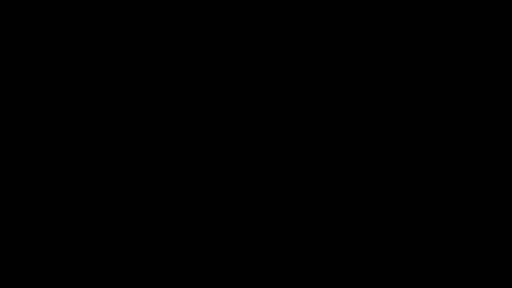

In [82]:
file= "data.txt" #file path or a file in the current folder
Image_Generator(file)